# Notebook for General Classification Tasks

In [29]:
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
from pandas import DataFrame
import more_itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.impute import SimpleImputer

pd.options.display.max_rows=900
pd.options.display.max_columns=900

import seaborn as sns
from IPython.display import display


In this notebook, we will have a bunch of basic Machine Learning problems with two different types of tasks: supervised (mostly) and unsupervised. The figure below helps point out the difference between both.

![title](img/superv_vs_unsuperv.png)


Let's, then, start with supervised learning tasks.

## Exercise 1 - Supervised task

Let's assume you've been given a feature set for binary classification (2 classes). You should explore the data by checking its distribution, the presence of noisy/corrupted samples (outliers), and, if it's the case, erase them from your training set, so that it does not compromise your model's decision making process.

You can (and should) make plots to visualize your data distribution.

Finally, you should set up the model that better separates both classes, train it, and test it on a specific testing set. 

To train the model, please load 'Data/X_train1.csv' and 'Data/y_train1.csv' as your training instances. 
To test your chosen model's performance, please load 'Data/X_test1.csv' and 'Data/y_test1.csv' as your testing instances.

This time, we give you a little help down below :)

In [62]:
X_train, y_train = pd.read_csv('Data/X_train1.csv', sep=','), pd.read_csv('Data/y_train1.csv', sep=',')

X_test, y_test = pd.read_csv('Data/X_test1.csv', sep=','), pd.read_csv('Data/y_test1.csv', sep=',')

print(f'No. features: {X_train.shape[1]}\nNo. training samples: {X_train.shape[0]}\nNo. testing samples: {X_test.shape[0]}')

No. features: 2
No. training samples: 1340
No. testing samples: 660


C:\Users\pedro.matias\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

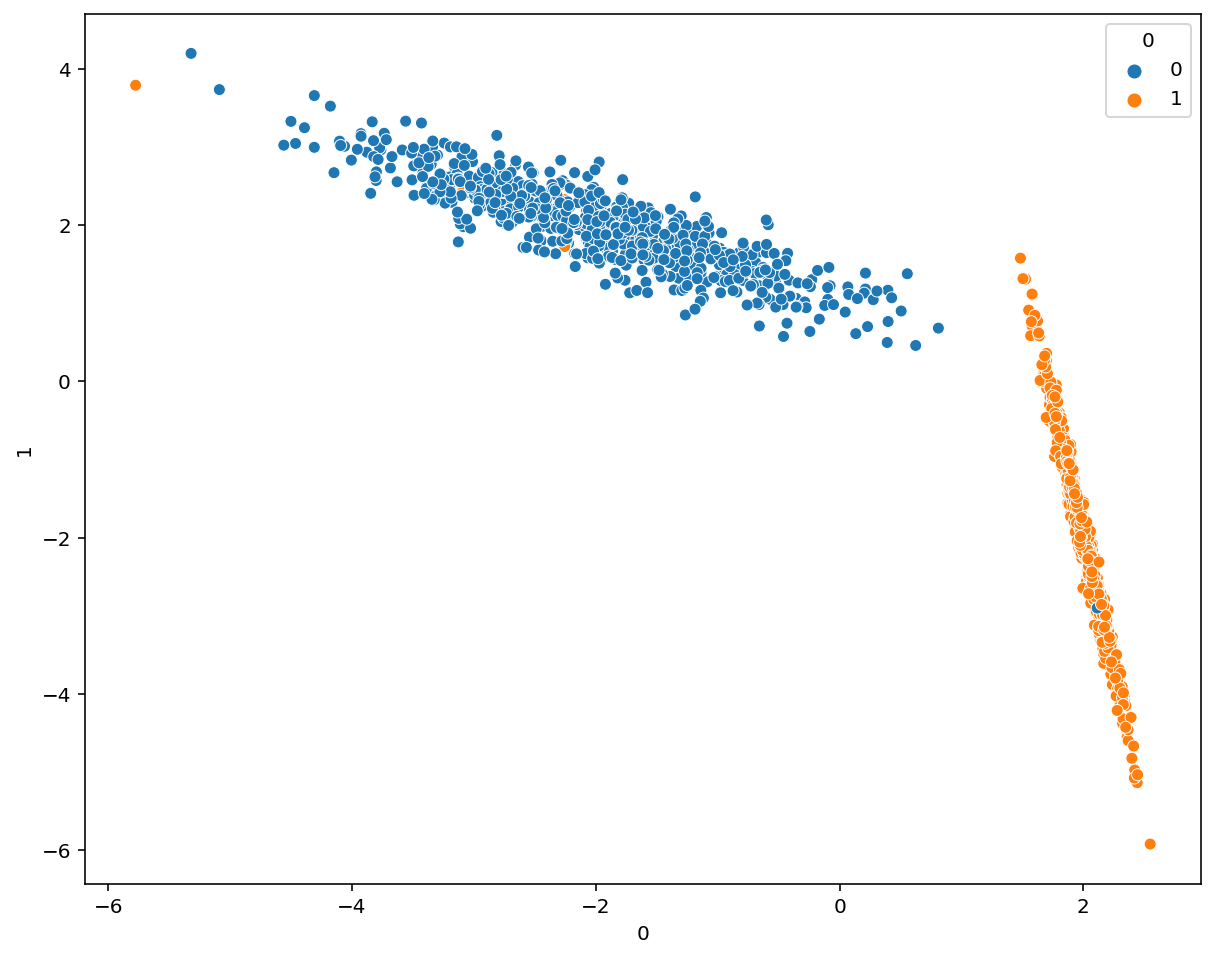

In [43]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(X_train['0'], X_train['1'], hue=y_train['0'])


Text(0.5, 1.0, 'Feature 1 - Class Separability')

<Figure size 1440x1008 with 0 Axes>

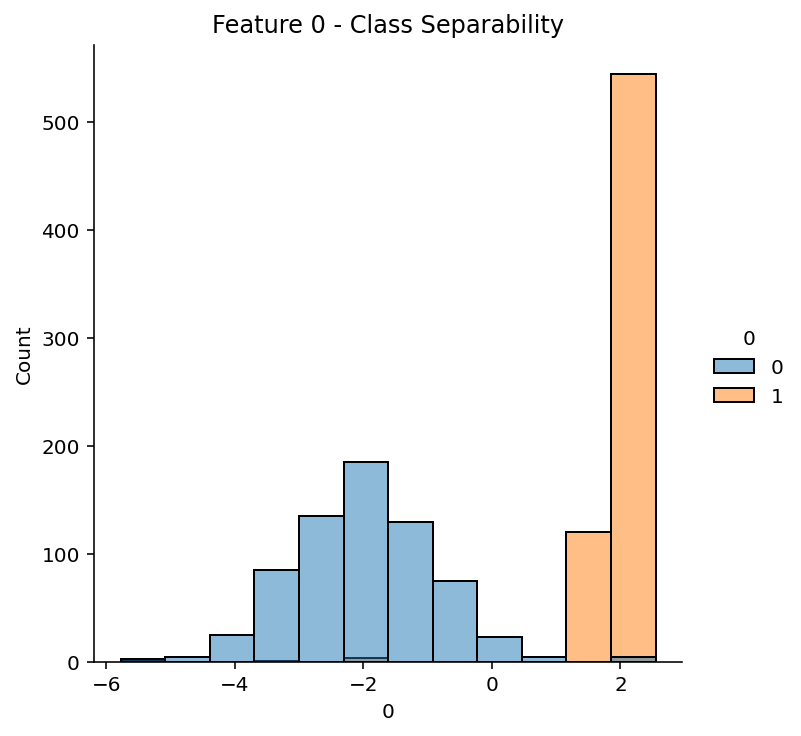

<Figure size 1440x1008 with 0 Axes>

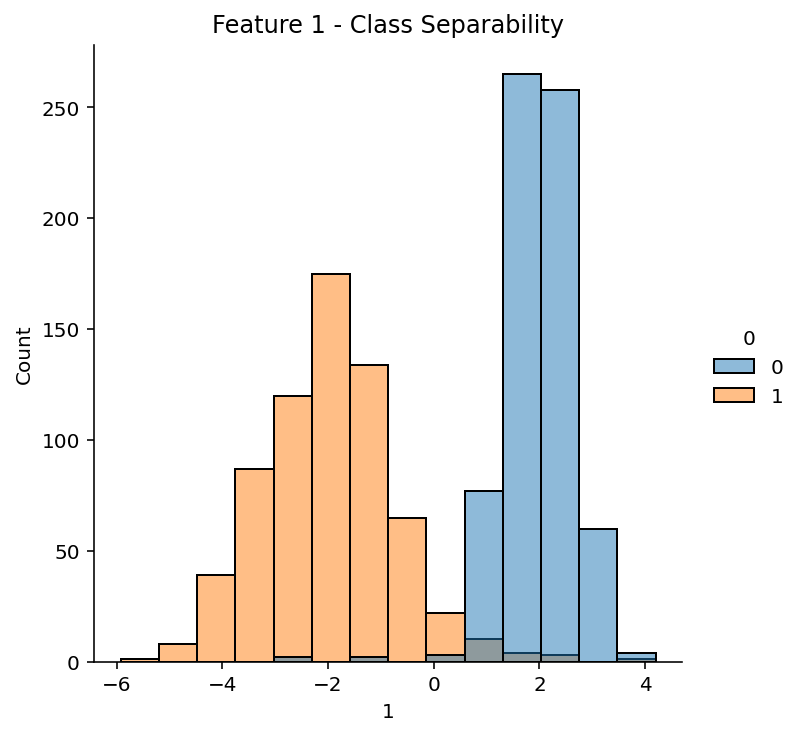

In [57]:
# Let's figure out the class separability respecting each one of the features presented

fig = plt.figure(figsize=(10, 7))

ax = sns.displot(data=X_train, x='0', hue=y_train['0'])

plt.title('Feature 0 - Class Separability')


fig = plt.figure(figsize=(10, 7))

ax = sns.displot(data=X_train, x='1', hue=y_train['0'])

plt.title('Feature 1 - Class Separability')

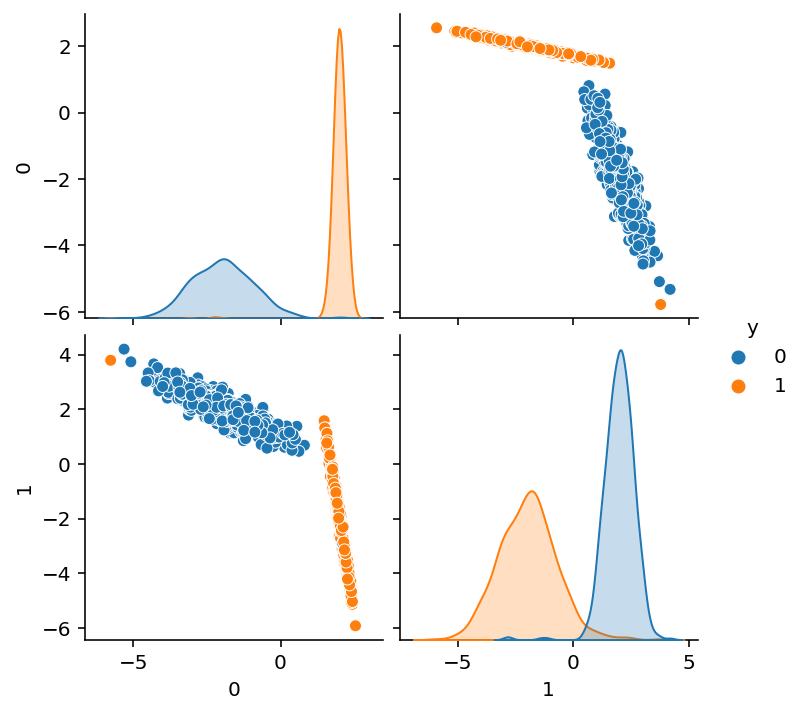

In [65]:
# It seems these features can reasonably well separate these two classes.
# Let's now take a look to another possible visualization mode of features' distributions

X_train_aux = X_train.copy()
X_train_aux['y'] = y_train['0']

sns.pairplot(X_train_aux, hue='y')

In [75]:
# Let's now create a Classification model instance.
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report


In [ ]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=200, splitter='best', criterion='gini') # our classifier

# We can now fit them with our feature data and the respective expected values
clf.fit(X=X_train, y=y_train)

# Now, let's print the results on the training set
y_pred_train = clf.predict(X=X_train)  # for prediction we don't need an expected value anymore (although we have it for evaluation)

report_train = classification_report(y_true=y_train['0'], y_pred=y_pred_train)

print(report_train)

In [72]:
# Now let's look up to our testing set. This is the set that will tell us the effective performance of our model.

# Now, let's print the results on the training set
y_pred_test = clf.predict(X=X_test)  # for prediction we don't need an expected value anymore (although we have it for evaluation)

report_test = classification_report(y_true=y_test['0'], y_pred=y_pred_test)

print(report_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       330
           1       0.99      1.00      0.99       330

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660



[Text(0.5, 31.0, 'Expected'), Text(67.0, 0.5, 'Predicted')]

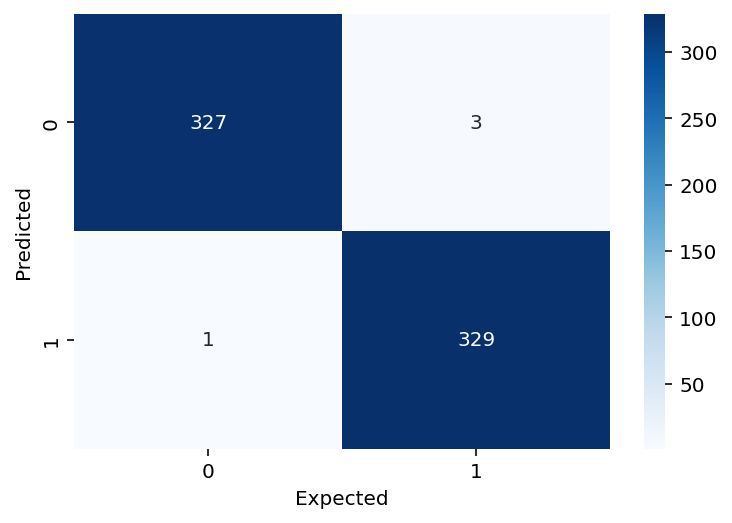

In [96]:
# Let's compute the confusion matrix so that we can get a raw perspective of our performance
cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test['0'])
hm = sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
hm.set(xlabel='Expected', ylabel='Predicted')

[Text(334.8, 362.4, 'X[0] <= 1.147\ngini = 0.5\nsamples = 1340\nvalue = [671, 669]'),
 Text(167.4, 217.44, 'X[0] <= -5.548\ngini = 0.015\nsamples = 672\nvalue = [667, 5]'),
 Text(83.7, 72.47999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 72.47999999999996, 'gini = 0.012\nsamples = 671\nvalue = [667, 4]'),
 Text(502.20000000000005, 217.44, 'X[0] <= 1.913\ngini = 0.012\nsamples = 668\nvalue = [4, 664]'),
 Text(418.5, 72.47999999999996, 'gini = 0.0\nsamples = 200\nvalue = [0, 200]'),
 Text(585.9, 72.47999999999996, 'gini = 0.017\nsamples = 468\nvalue = [4, 464]')]

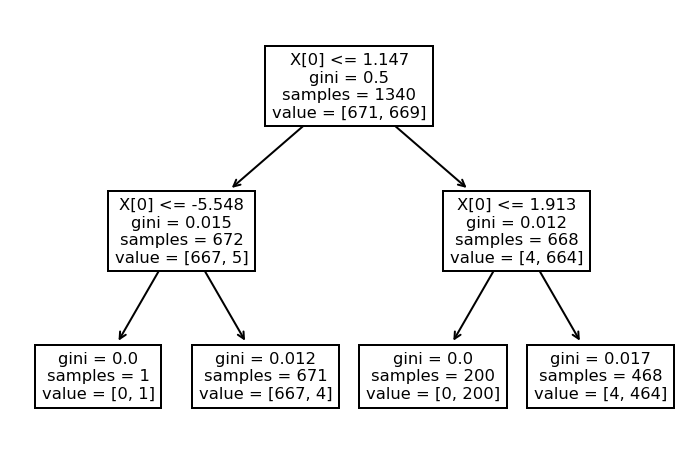

In [76]:
# Decision Tree plot, to stay aware of how the tree has been optimized
plot_tree(clf)

## Exercise 2 - Supervised task (Noise handling)

Let's assume you've been given a feature set for binary classification (2 classes). You should explore the data by checking its distribution, the presence of noisy/corrupted samples (outliers), and, if it's the case, erase them from your training set, so that it does not compromise your model's decision making process.

You can (and should) make plots to visualize your data distribution.

Finally, you should set up the model that better separates both classes, train it, and test it on a specific testing set. 

To train the model, please load 'Data/X_train2.csv' and 'Data/y_train2.csv' as your training instances.
To test your chosen model's performance, please load 'Data/X_test2.csv' and 'Data/y_test2.csv' as your testing instances.

The feature sets are similar but, this time, present slight variations.

## Exercise 3 - Supervised task (Non-linear relationship)

In this exercise, features might present a non-linear relation between each other. 

To train the model, please load 'Data/X_train3.csv' and 'Data/y_train3.csv' as your training instances. To test your chosen model's performance, please load 'Data/X_test3.csv' and 'Data/y_test3.csv' as your testing instances.

Please note the performance differences in using a linear and a kernel-based (SVM). Report both performances.

In [77]:
from sklearn.svm import SVC

In [78]:
# Classifiers
linear_svm = SVC(C=1.0, kernel='linear')
kernel_svm = SVC(C=1.0, kernel='rbf')

## Exercise 4 - Supervised task (Concentric distribution)

In this exercise, features might describe a gaussian distribution displaced in a concentric way. 

To train the model, please load 'Data/X_train4.csv' and 'Data/y_train4.csv' as your training instances. To test your chosen model's performance, please load 'Data/X_test4.csv' and 'Data/y_test4.csv' as your testing instances.

## Exercise 5 - Supervised task (Easy vs hard decision boundary)

In this exercise, you'll have 2 subsets: one with an easy decision boundary and other with a hard one.

To train two different models, please load 'Data/X_train5a.csv', 'Data/y_train5a.csv' (easy boundary), and 'Data/X_train5b.csv', 'Data/y_train5b.csv' (hard boundary) as your training instances. 

To test your chosen models' performances, please load 'Data/X_test5a.csv', 'Data/y_test5a.csv' (easy boundary), and 'Data/X_test5b.csv', 'Data/y_test5b.csv' (hard boundary) as your testing instances.

As performed before, try to clean some samples from both classes, to check whether the classification performance improves or not. Compare performances before and after cleaning some samples.

Note: sometimes, more data does not imply more relevant information.

## Exercise 6 - Supervised task (feature selection)

Now, the number of features will increase up to a multi-dimensional space.

In this time, there are some non-informative features, so you will realize their presence can impair the model learning process and influence its robustness. The goal here is to select the optimal number of features in order to achieve an optimal performance.

To train the model, please load 'Data/X_train6.csv' and 'Data/y_train6.csv' as your training instances. To test your chosen model's performance, please load 'Data/X_test6.csv' and 'Data/y_test6.csv' as your testing instances.

## Exercise 7 - Unsupervised task (looking for clusters)

Now we have unlabeled data. And we are looking for a blind-fold annotation of each label into X different classes.

We have several ways to do so, and that will always depend the case we're tackling. Let's try two different techniques: 

- K-means clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

- Hierarchical clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

These two algorithms are intialized downbelow

To train the model, please load 'Data/X_train7.csv' (data with no labels) as your training instance and 'Data/y_train7.csv' (expected labels) as your testing/validation instance.

In addition, try to test which number of clusters is the most adequate to achieve the most accurate labelling/clustering on kmeans algorithm.

In [82]:
import sklearn.cluster

In [86]:
n_clust = 2

# In Kmeans, you must define the number of cluster before feeding data
kmeans = sklearn.cluster.KMeans(n_clusters=n_clust) # 2 is arbitrary

# Hierarchical clustering with different linkage types
ward = sklearn.cluster.AgglomerativeClustering(
        n_clusters=n_clust, linkage="ward"
    )

complete = sklearn.cluster.AgglomerativeClustering(
        n_clusters=n_clust, linkage="complete"
    )

average = sklearn.cluster.AgglomerativeClustering(
        n_clusters=n_clust, linkage="average"
    )

single = sklearn.cluster.AgglomerativeClustering(
        n_clusters=n_clust, linkage="single"
    )